In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
excel_file_path = '/content/drive/MyDrive/data_opt.xlsx'
df = pd.read_excel(excel_file_path)
df_1 = pd.read_excel(excel_file_path)
#df = pd.read_excel(excel_file_path,index_col='period')

# Lag Feature

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import copy

# Load your data (replace 'your_data.csv' with your dataset file)
data = copy.copy(df)

# Define the number of time steps to forecast (T)
T = 8

# Define the number of past periods to consider (p)
p = 20

# Define the target variable (e.g., 'BFG' in this case)
target_variable = 'BFG'

# Create lag features for the past p periods
for lag in range(1, p + 1):
    data[f'{target_variable}_lag_{lag}'] = data[target_variable].shift(lag)

# Drop rows with NaN values (due to the lag features)
data.dropna(inplace=True)
#print(data)
# Split the data into features (X) and target variable (y)
X = data[[f'{target_variable}_lag_{lag}' for lag in range(1, p + 1)]]
y = data[target_variable]
print(X)
# Create and train the GBDT model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
model.fit(X, y)

# Perform T-step forecasting (forecasting T steps into the future)
forecasted_values = []

# Perform T-step predictions
for i in range(T):
    # Use the most recent p values for prediction
    recent_data = X.iloc[-1].values.reshape(1, -1)
    #print(recent_data.shape)
    forecasted_value = model.predict(recent_data)[0]
    #print(model.predict(recent_data))
    #break

    # Append the forecasted value to the results
    forecasted_values.append(forecasted_value)

    # Update X with the new value for the next prediction
    X.iloc[-1] = X.iloc[-1].shift(1)
    X.iloc[-1, 0] = forecasted_value
print(X)
# Calculate the actual values for comparison (you should have actual values)
actual_values = []  # Replace with your actual values

# Calculate MAPE
# mape = np.mean(np.abs(np.array(actual_values) - np.array(forecasted_values)) / np.array(actual_values)) * 100

# # Print the T-step forecasted values and MAPE
# print("T-step forecasted values:")
# print(forecasted_values)
# print("MAPE:", mape)


     BFG_lag_1  BFG_lag_2  BFG_lag_3  BFG_lag_4  BFG_lag_5  BFG_lag_6  \
20       536.0      526.0      540.0      522.0      519.0      492.0   
21       533.0      536.0      526.0      540.0      522.0      519.0   
22       512.0      533.0      536.0      526.0      540.0      522.0   
23       561.0      512.0      533.0      536.0      526.0      540.0   
24       515.0      561.0      512.0      533.0      536.0      526.0   
..         ...        ...        ...        ...        ...        ...   
995      522.0      523.0      473.0      489.0      517.0      458.0   
996      520.0      522.0      523.0      473.0      489.0      517.0   
997      517.0      520.0      522.0      523.0      473.0      489.0   
998      570.0      517.0      520.0      522.0      523.0      473.0   
999      521.0      570.0      517.0      520.0      522.0      523.0   

     BFG_lag_7  BFG_lag_8  BFG_lag_9  BFG_lag_10  BFG_lag_11  BFG_lag_12  \
20       483.0      471.0      479.0       505.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
<ipython-input-32-817e00f1ba34>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.iloc[-1] = X.iloc[-1].shift(1)
<ipython-input-32-817e00f1ba34>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.iloc[-1, 0] = forecasted_value
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
<ipython-input-32-81

# Rolling Windows

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Load your data (replace 'your_data.csv' with your dataset file)
data = copy.copy(df)
# Define the number of time steps to forecast (T)
T = 8

# Define the number of past periods to consider (p)
p = 20

# Define the target variable (e.g., 'BFG' in this case)
target_variable = 'BFG'

# Create lag features for the past p periods
for lag in range(1, p + 1):
    data[f'{target_variable}_lag_{lag}'] = data[target_variable].shift(lag)

# Split the data into features (X) and target variable (y)
X = data[[f'{target_variable}_lag_{lag}' for lag in range(1, p + 1)]]
y = data[target_variable]
print(X,y)

# Create and train the GBDT model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
model.fit(X, y)

# Perform T-step forecasting (forecasting T steps into the future)
forecasted_values = []

# Perform T-step predictions using a rolling window
for i in range(T):
    # Use the most recent p values for prediction
    recent_data = X.iloc[-1].values.reshape(1, -1)
    forecasted_value = model.predict(recent_data)[0]

    # Append the forecasted value to the results
    forecasted_values.append(forecasted_value)

    # Update X with the new value for the next prediction (rolling window)
    X = X.shift(1)
    X.iloc[0, 0] = forecasted_value

# Calculate the actual values for comparison (you should have actual values)
actual_values = []  # Replace with your actual values

# Calculate MAPE
mape = np.mean(np.abs(np.array(actual_values) - np.array(forecasted_values)) / np.array(actual_values)) * 100

# Print the T-step forecasted values and MAPE
print("T-step forecasted values:")
print(forecasted_values)
print("MAPE:", mape)


NameError: ignored

In [ ]:
data

,period,BFG,LDG,COG,BFG_lag_1,BFG_lag_2,BFG_lag_3,BFG_lag_4,BFG_lag_5,BFG_lag_6,...,BFG_lag_11,BFG_lag_12,BFG_lag_13,BFG_lag_14,BFG_lag_15,BFG_lag_16,BFG_lag_17,BFG_lag_18,BFG_lag_19,BFG_lag_20
20,21,533,57,49,536.0,526.0,540.0,522.0,519.0,492.0,...,524.0,507.0,504.0,513.0,524.0,525.0,548.0,545.0,572.0,542.0
21,22,512,59,50,533.0,536.0,526.0,540.0,522.0,519.0,...,505.0,524.0,507.0,504.0,513.0,524.0,525.0,548.0,545.0,572.0
22,23,561,45,51,512.0,533.0,536.0,526.0,540.0,522.0,...,479.0,505.0,524.0,507.0,504.0,513.0,524.0,525.0,548.0,545.0
23,24,515,45,47,561.0,512.0,533.0,536.0,526.0,540.0,...,471.0,479.0,505.0,524.0,507.0,504.0,513.0,524.0,525.0,548.0
24,25,508,65,46,515.0,561.0,512.0,533.0,536.0,526.0,...,483.0,471.0,479.0,505.0,524.0,507.0,504.0,513.0,524.0,525.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,520,49,48,522.0,523.0,473.0,489.0,517.0,458.0,...,504.0,474.0,502.0,514.0,452.0,535.0,460.0,469.0,517.0,414.0
996,997,517,72,48,520.0,522.0,523.0,473.0,489.0,517.0,...,456.0,504.0,474.0,502.0,514.0,452.0,535.0,460.0,469.0,517.0
997,998,570,59,46,517.0,520.0,522.0,523.0,473.0,489.0,...,434.0,456.0,504.0,474.0,502.0,514.0,452.0,535.0,460.0,469.0
998,999,521,45,41,570.0,517.0,520.0,522.0,523.0,473.0,...,501.0,434.0,456.0,504.0,474.0,502.0,514.0,452.0,535.0,460.0


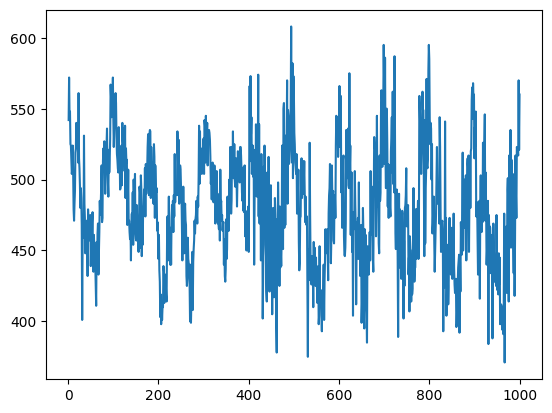

In [ ]:
plt.plot(df['period'], df['BFG'])

In [ ]:
X_test

,period,BFG,LDG,COG,BFG_Lag_1,BFG_Lag_2,BFG_Lag_3,BFG_Lag_4,BFG_Lag_5,BFG_Lag_6,...,BFG_Lag_11,BFG_Lag_12,BFG_Lag_13,BFG_Lag_14,BFG_Lag_15,BFG_Lag_16,BFG_Lag_17,BFG_Lag_18,BFG_Lag_19,BFG_Lag_20
804,805,500,65,47,536.0,540.0,525.0,544.0,585.0,595.0,...,571.0,505.0,494.0,455.0,542.0,446.0,498.0,549.0,549.0,562.0
805,806,525,62,47,500.0,536.0,540.0,525.0,544.0,585.0,...,510.0,571.0,505.0,494.0,455.0,542.0,446.0,498.0,549.0,549.0
806,807,462,44,48,525.0,500.0,536.0,540.0,525.0,544.0,...,508.0,510.0,571.0,505.0,494.0,455.0,542.0,446.0,498.0,549.0
807,808,469,44,42,462.0,525.0,500.0,536.0,540.0,525.0,...,514.0,508.0,510.0,571.0,505.0,494.0,455.0,542.0,446.0,498.0
808,809,485,56,41,469.0,462.0,525.0,500.0,536.0,540.0,...,577.0,514.0,508.0,510.0,571.0,505.0,494.0,455.0,542.0,446.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,520,49,48,522.0,523.0,473.0,489.0,517.0,458.0,...,504.0,474.0,502.0,514.0,452.0,535.0,460.0,469.0,517.0,414.0
996,997,517,72,48,520.0,522.0,523.0,473.0,489.0,517.0,...,456.0,504.0,474.0,502.0,514.0,452.0,535.0,460.0,469.0,517.0
997,998,570,59,46,517.0,520.0,522.0,523.0,473.0,489.0,...,434.0,456.0,504.0,474.0,502.0,514.0,452.0,535.0,460.0,469.0
998,999,521,45,41,570.0,517.0,520.0,522.0,523.0,473.0,...,501.0,434.0,456.0,504.0,474.0,502.0,514.0,452.0,535.0,460.0


Mean Squared Error for 8-step ahead forecast: 0.03696670135147217
Mean Absolute Error for 8-step ahead forecast: 0.14970406907890965


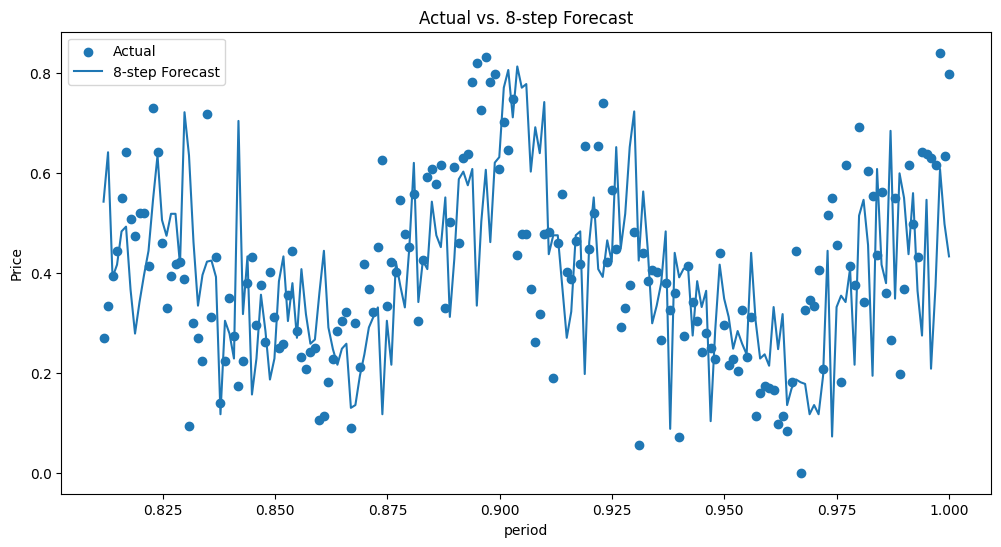

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error as mae
# Assuming you have loaded your DataFrame from an Excel file
df = pd.read_excel(excel_file_path)

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(df)

# Create a new DataFrame with the scaled data
df = pd.DataFrame(scaled_data, columns=df.columns)

# Define the T-step and p values
T = 8  # Number of time steps to forecast ahead
p = 20  # Number of lagged values to include as predictors

# Create lagged features
for lag in range(1, p + 1):
    df[f'BFG_Lag_{lag}'] = df['BFG'].shift(lag)

# Drop missing values resulting from creating lagged features
df = df.dropna()

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data, test_data = df[:train_size], df[train_size:]

# Prepare the feature and target variables for training and testing
X_train, y_train = train_data, train_data['BFG']
X_test, y_test = test_data, test_data['BFG']



# lgb_params = {
#     'n_jobs': 1,
#     'max_depth': 4,
#     'min_data_in_leaf': 10,
#     'subsample': 0.9,
#     'n_estimators': 10,
#     'learning_rate': 0.1,
#     'colsample_bytree': 0.9,
#     'boosting_type': 'gbdt'
# }
#lgb_l2 = LGBMRegressor(objective='regression', **lgb_params)

# Initialize and train the Random Forest regressor
#gb_regressor = LGBMRegressor(objective='regression', **lgb_params)
gb_regressor = GradientBoostingRegressor(n_estimators=30, random_state=0)
gb_regressor.fit(X_train, y_train)

# Make predictions for T time steps ahead on the test data
forecasted_values = []
for i in range(len(X_test) - T + 1):
    input_data = X_test.iloc[i:i + 1]  # Input data for prediction
    forecast = gb_regressor.predict(input_data)  # Predict T time steps ahead
    forecasted_values.append(forecast[0])

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test[T - 1:], forecasted_values)
print(f"Mean Squared Error for {T}-step ahead forecast: {mse}")

m_a_e=mae(y_test[T - 1:], forecasted_values)
print(f"Mean Absolute Error for {T}-step ahead forecast: {m_a_e}")
# Visualize the actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.scatter(test_data['period'][T - 1:], y_test[T - 1:], label='Actual')
plt.plot(test_data['period'][T - 1:], forecasted_values, label=f'{T}-step Forecast')
plt.xlabel('period')
plt.ylabel('Price')
plt.legend()
plt.title(f'Actual vs. {T}-step Forecast')
plt.show()


# With Grid Search CV

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 30, 'subsample': 0.9}
Best MSE: 0.013652307208373404
Mean Squared Error for 8-step ahead forecast: 0.0371749145697956
Mean Absolute Error for 8-step ahead forecast: 0.15708860714539838


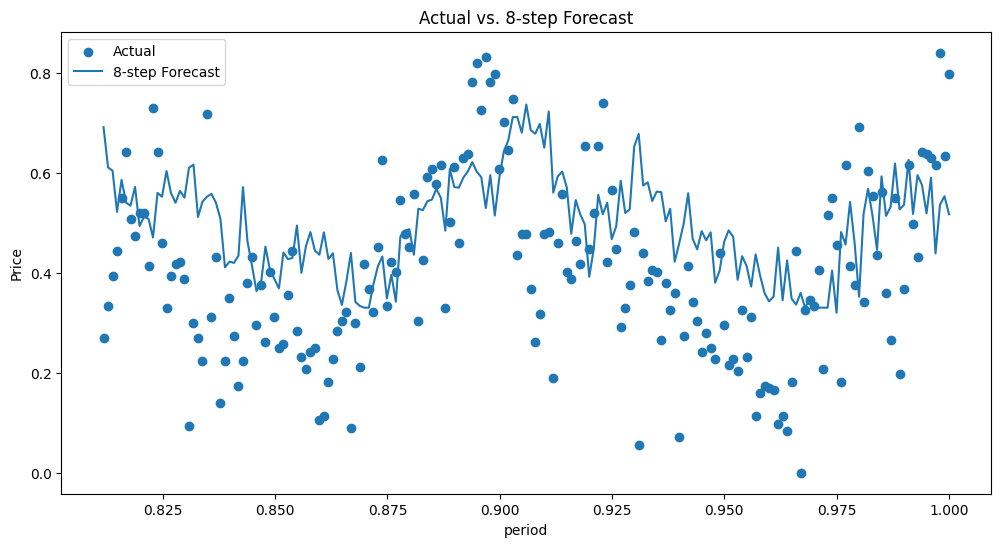

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you have loaded your DataFrame from an Excel file
df = pd.read_excel(excel_file_path)

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(df)

# Create a new DataFrame with the scaled data
df = pd.DataFrame(scaled_data, columns=df.columns)

# Define the T-step and p values
T = 8  # Number of time steps to forecast ahead
p = 20  # Number of lagged values to include as predictors

# Create lagged features
for lag in range(1, p + 1):
    df[f'BFG_Lag_{lag}'] = df['BFG'].shift(lag)

# Drop missing values resulting from creating lagged features
df = df.dropna()

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data, test_data = df[:train_size], df[train_size:]

# Prepare the feature and target variables for training and testing
X_train, y_train = train_data.drop(columns=['BFG']), train_data['BFG']
X_test, y_test = test_data.drop(columns=['BFG']), test_data['BFG']

# Define the hyperparameter grid
param_grid = {
    # 'n_estimators': [10, 30, 50,70],
    # 'learning_rate': [0.01, 0.1, 0.2],
    # 'max_depth': [3, 4, 5],
    # 'subsample': [0.8, 0.9, 1.0],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': ['auto', 'sqrt', 'log2', None],
    # 'loss': ['ls', 'lad', 'huber', 'quantile'],
    # 'alpha': [0.9, 0.95, 0.99],
    'n_estimators': [10, 30, 70],  # You can expand this range
    'learning_rate': [0.01, 0.1, 0.2],  # You can expand this range
    'max_depth': [3, 4, 5],  # You can expand this range
    'subsample': [0.8, 0.9, 1.0],  # You can expand this range
}

# Initialize the GridSearchCV with the GradientBoostingRegressor and parameter grid
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=0),
                           param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding MSE
print("Best Hyperparameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

# Get the best model with the tuned hyperparameters
best_gb_regressor = grid_search.best_estimator_

# Make predictions for T time steps ahead on the test data using the best model
forecasted_values = []
for i in range(len(X_test) - T + 1):
    input_data = X_test.iloc[i:i + 1]  # Input data for prediction
    forecast = best_gb_regressor.predict(input_data)  # Predict T time steps ahead
    forecasted_values.append(forecast[0])

# Evaluate the model using Mean Squared Error and Mean Absolute Error
mse = mean_squared_error(y_test[T - 1:], forecasted_values)
print(f"Mean Squared Error for {T}-step ahead forecast: {mse}")

m_a_e = mae(y_test[T - 1:], forecasted_values)
print(f"Mean Absolute Error for {T}-step ahead forecast: {m_a_e}")

# Visualize the actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.scatter(test_data['period'][T - 1:], y_test[T - 1:], label='Actual')
plt.plot(test_data['period'][T - 1:], forecasted_values, label=f'{T}-step Forecast')
plt.xlabel('period')
plt.ylabel('Price')
plt.legend()
plt.title(f'Actual vs. {T}-step Forecast')
plt.show()


# For 0.1 Quantile

In [ ]:
# Define a custom loss function for quantile regression
def quantile_loss(y, y_pred):
    e = y - y_pred
    return np.maximum(quantile * e, (quantile - 1) * e)

Mean Squared Error for 8-step ahead forecast (quantile 0.9): 0.031826010176932
Mean Absolute Error for 8-step ahead forecast (quantile 0.9): 0.14044345101297


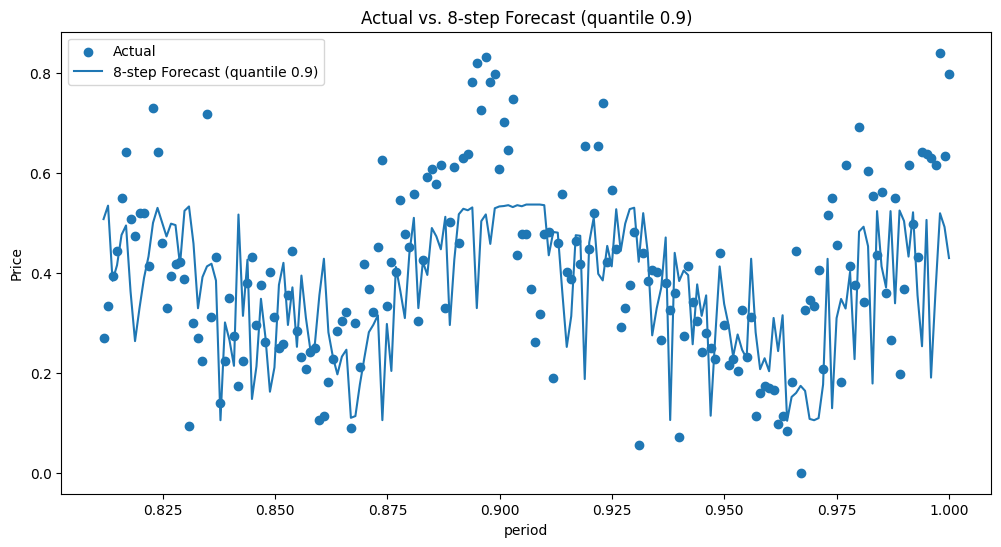

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error as mae

# Assuming you have loaded your DataFrame from an Excel file
df = pd.read_excel(excel_file_path)

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(df)

# Create a new DataFrame with the scaled data
df = pd.DataFrame(scaled_data, columns=df.columns)

# Define the T-step and p values
T = 8  # Number of time steps to forecast ahead
p = 20  # Number of lagged values to include as predictors

# Create lagged features
for lag in range(1, p + 1):
    df[f'BFG_Lag_{lag}'] = df['BFG'].shift(lag)

# Drop missing values resulting from creating lagged features
df = df.dropna()

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data, test_data = df[:train_size], df[train_size:]

# Prepare the feature and target variables for training and testing
X_train, y_train = train_data, train_data['BFG']
X_test, y_test = test_data, test_data['BFG']

# Initialize and train the Gradient Boosting regressor for quantile 0.9
gb_regressor_09 = GradientBoostingRegressor(n_estimators=30, loss='quantile', alpha=0.2, random_state=0)
gb_regressor_09.fit(X_train, y_train)

# Make predictions for T time steps ahead on the test data for quantile 0.9
forecasted_values_09 = []
for i in range(len(X_test) - T + 1):
    input_data = X_test.iloc[i:i + 1]  # Input data for prediction
    forecast = gb_regressor_09.predict(input_data)  # Predict T time steps ahead
    forecasted_values_09.append(forecast[0])

# Evaluate the model for quantile 0.9 using Mean Squared Error
mse_09 = mean_squared_error(y_test[T - 1:], forecasted_values_09)
print(f"Mean Squared Error for {T}-step ahead forecast (quantile 0.9): {mse_09}")

m_a_e_09 = mae(y_test[T - 1:], forecasted_values_09)
print(f"Mean Absolute Error for {T}-step ahead forecast (quantile 0.9): {m_a_e_09}")

# Visualize the actual vs. forecasted values for quantile 0.9
plt.figure(figsize=(12, 6))
plt.scatter(test_data['period'][T - 1:], y_test[T - 1:], label='Actual')
plt.plot(test_data['period'][T - 1:], forecasted_values_09, label=f'{T}-step Forecast (quantile 0.9)')
plt.xlabel('period')
plt.ylabel('Price')
plt.legend()
plt.title(f'Actual vs. {T}-step Forecast (quantile 0.9)')
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test[T - 1:], forecasted_values)

0.14970406907890965

Mean Squared Error for 8-step ahead forecast: 0.06227521163901671


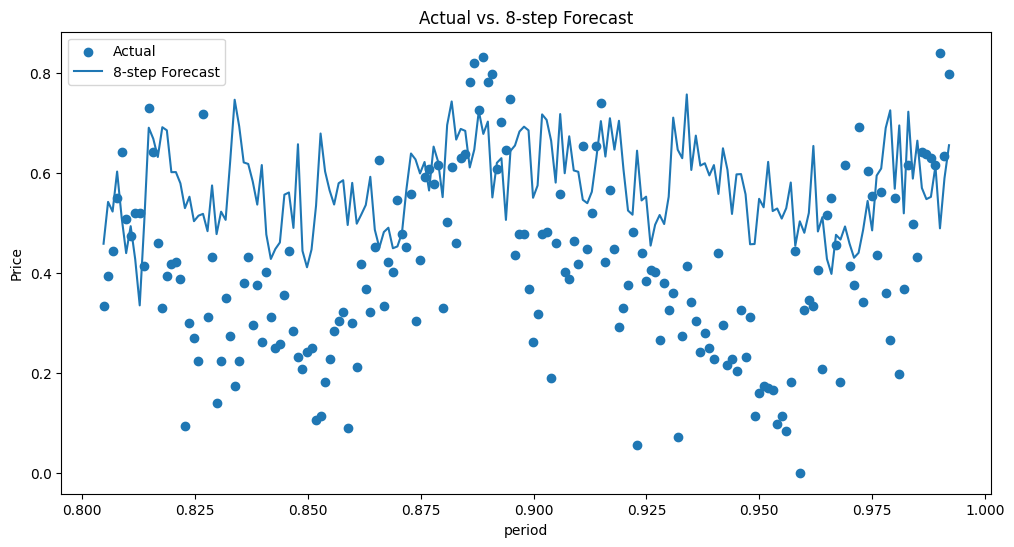

In [ ]:
# Assuming you have loaded your DataFrame from an Excel file
df = pd.read_excel(excel_file_path)

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(df)

# Create a new DataFrame with the scaled data
df = pd.DataFrame(scaled_data, columns=df.columns)

# Define the T-step and p values
T = 8  # Number of time steps to forecast ahead
p = 20  # Number of lagged values to include as predictors

# Create lagged features
for lag in range(1, p + 1):
    df[f'BFG_Lag_{lag}'] = df['BFG'].shift(lag)

# Drop missing values resulting from creating lagged features
df = df.dropna()

# Create a target variable (y) that contains 8 days of data for each sample
y = df['BFG'].shift(-T)
df['y'] = y

# Drop rows with NaN values resulting from shifting the target variable
df = df.dropna()

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data, test_data = df[:train_size], df[train_size:]

# Prepare the feature and target variables for training and testing
X_train, y_train = train_data.drop(columns=['y']), train_data['y']
X_test, y_test = test_data.drop(columns=['y']), test_data['y']

# Initialize and train the Random Forest regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=0)
gb_regressor.fit(X_train, y_train)

# Make predictions for T time steps ahead on the test data
forecasted_values = []

for i in range(len(X_test) - T + 1):
    input_data = X_test.iloc[i:i + 1]  # Input data for prediction
    forecast = gb_regressor.predict(input_data)  # Predict T time steps ahead
    forecasted_values.extend(forecast)  # Extend the list with 8 forecasts

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test[T - 1:], forecasted_values)
print(f"Mean Squared Error for {T}-step ahead forecast: {mse}")

# Visualize the actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.scatter(test_data['period'][T - 1:], y_test[T - 1:], label='Actual')
plt.plot(test_data['period'][T - 1:], forecasted_values, label=f'{T}-step Forecast')
plt.xlabel('period')
plt.ylabel('Price')
plt.legend()
plt.title(f'Actual vs. {T}-step Forecast')
plt.show()


In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

# Assuming you have loaded your time series data into 'df' with columns 'Date' and 'Price'
# Define the T-step and p values
T = 8  # Number of time steps to forecast ahead
p = 20  # Number of lagged values to include as predictors

# Create lagged features
for lag in range(1, p + 1):
    df[f'z_Lag_{lag}'] = df['z'].shift(lag)

# Drop missing values resulting from creating lagged features
df = df.dropna()

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data, test_data = df[:train_size], df[train_size:]

# Prepare the feature and target variables for training and testing
X_train, y_train = train_data.drop('z', axis=1), train_data['z']
X_test, y_test = test_data.drop('z', axis=1), test_data['z']

# Define the quantile loss function
def quantile_loss(y_true, y_pred, quantile):
    e = y_true - y_pred
    return np.sum((quantile - 1) * np.maximum(e, 0) - quantile * np.maximum(-e, 0))

# Choose the quantile to estimate (e.g., 0.5 for median)
quantile = 0.5

# Initialize the GBDT model (hyperparameters can be adjusted)
gbdt = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)

# Fit the GBDT model using the quantile loss
gbdt.fit(X_train, y_train)

# Predict quantiles for new data
new_data = np.array([your_new_data])  # Replace with your new data
predicted_quantile = gbdt.predict(new_data)

# Compute the estimated quantile
estimated_quantile = np.percentile(y_train, quantile * 100)

print(f"Predicted {quantile}-th quantile: {predicted_quantile[0]}")
print(f"Estimated {quantile}-th quantile: {estimated_quantile}")


In [ ]:
df

,period,BFG,LDG,COG,BFG_Lag_1,BFG_Lag_2,BFG_Lag_3,BFG_Lag_4,BFG_Lag_5,BFG_Lag_6,...,COG_Lag_11,COG_Lag_12,COG_Lag_13,COG_Lag_14,COG_Lag_15,COG_Lag_16,COG_Lag_17,COG_Lag_18,COG_Lag_19,COG_Lag_20
220,221,443,65,49,474.0,455.0,414.0,419.0,430.0,433.0,...,50.0,46.0,44.0,47.0,43.0,42.0,44.0,44.0,49.0,47.0
221,222,461,56,45,443.0,474.0,455.0,414.0,419.0,430.0,...,45.0,50.0,46.0,44.0,47.0,43.0,42.0,44.0,44.0,49.0
222,223,488,48,46,461.0,443.0,474.0,455.0,414.0,419.0,...,44.0,45.0,50.0,46.0,44.0,47.0,43.0,42.0,44.0,44.0
223,224,447,43,48,488.0,461.0,443.0,474.0,455.0,414.0,...,49.0,44.0,45.0,50.0,46.0,44.0,47.0,43.0,42.0,44.0
224,225,445,58,49,447.0,488.0,461.0,443.0,474.0,455.0,...,48.0,49.0,44.0,45.0,50.0,46.0,44.0,47.0,43.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,520,49,48,522.0,523.0,473.0,489.0,517.0,458.0,...,39.0,41.0,41.0,37.0,43.0,38.0,41.0,40.0,40.0,42.0
996,997,517,72,48,520.0,522.0,523.0,473.0,489.0,517.0,...,43.0,39.0,41.0,41.0,37.0,43.0,38.0,41.0,40.0,40.0
997,998,570,59,46,517.0,520.0,522.0,523.0,473.0,489.0,...,45.0,43.0,39.0,41.0,41.0,37.0,43.0,38.0,41.0,40.0
998,999,521,45,41,570.0,517.0,520.0,522.0,523.0,473.0,...,50.0,45.0,43.0,39.0,41.0,41.0,37.0,43.0,38.0,41.0


<ipython-input-25-e156ff5c9d79>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[['BFG','LDG','COG']], shade=True)


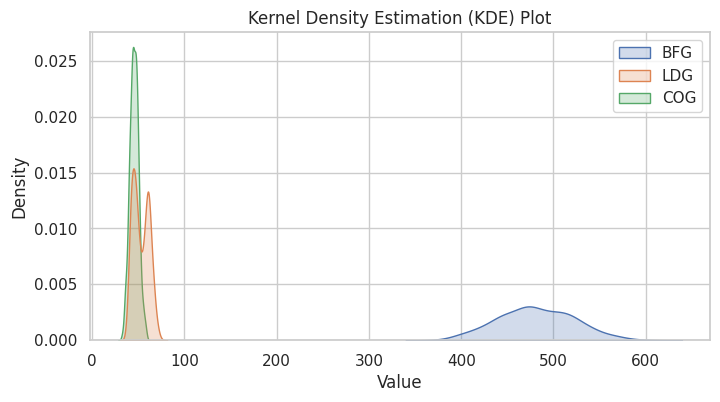

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))  # Adjust the figure size as needed

# Use sns.kdeplot to create the KDE plot
sns.kdeplot(data=df[['BFG','LDG','COG']], shade=True)

# Customize the plot
plt.title('Kernel Density Estimation (KDE) Plot')
plt.xlabel('Value')
plt.ylabel('Density')

# Show the plot
plt.show()

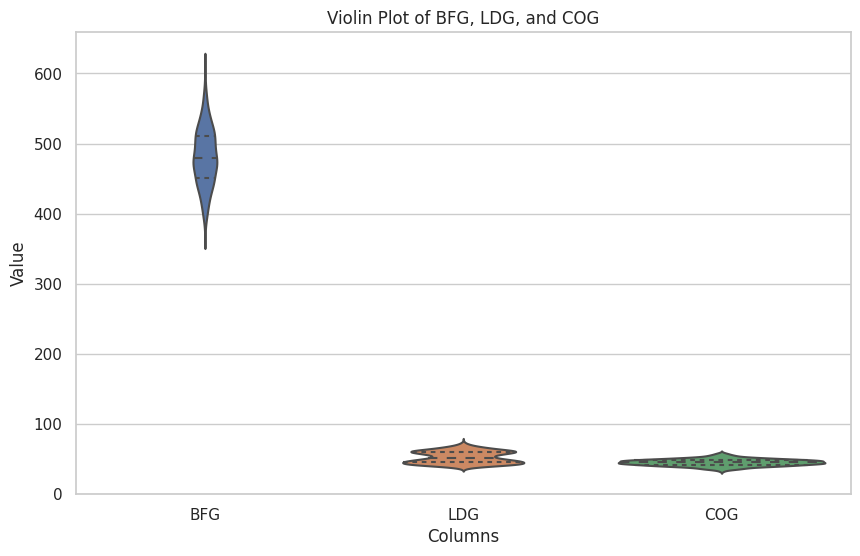

In [ ]:
# Set style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create a violin plot
sns.violinplot(data=df[['BFG', 'LDG', 'COG']], inner="quart")

# Customize the plot
plt.title('Violin Plot of BFG, LDG, and COG')
plt.xlabel('Columns')
plt.ylabel('Value')

# Show the plot
plt.show()

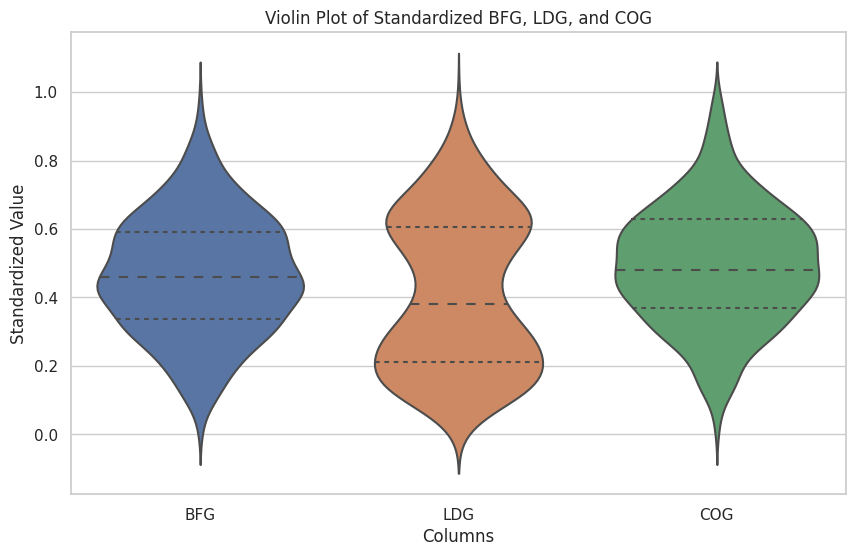

In [ ]:
# Standardize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['BFG', 'LDG', 'COG']])

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=['BFG', 'LDG', 'COG'])

# Set style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create a violin plot for the standardized data
sns.violinplot(data=scaled_df, inner="quart")

# Customize the plot
plt.title('Violin Plot of Standardized BFG, LDG, and COG')
plt.xlabel('Columns')
plt.ylabel('Standardized Value')

# Show the plot
plt.show()

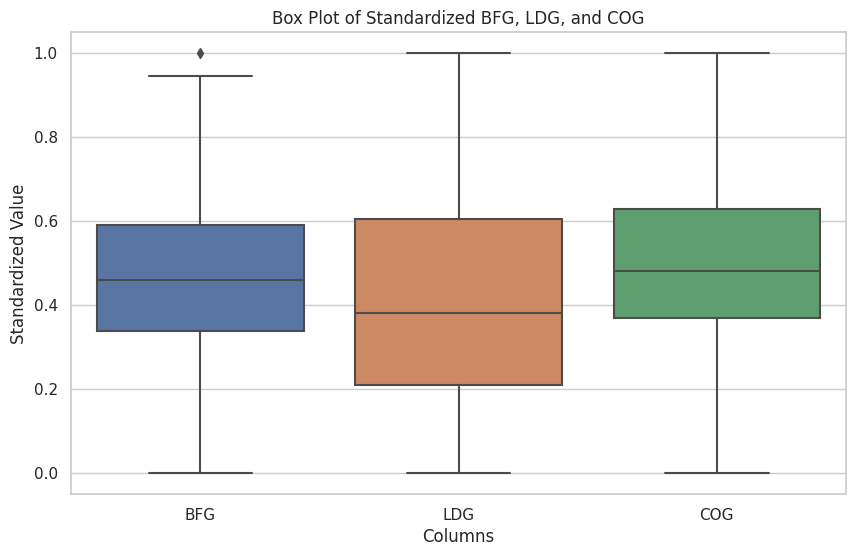

In [ ]:
# Set style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create a box plot for the standardized data
sns.boxplot(data=scaled_df)

# Customize the plot
plt.title('Box Plot of Standardized BFG, LDG, and COG')
plt.ylabel('Standardized Value')
plt.xlabel('Columns')

# Show the plot
plt.show()



In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor

# Load your sample data
data = df

# Define the quantiles you want to predict
quantiles = [0.01,0.05,0.1, 0.5, 0.9]

# Initialize dictionaries to store quantile predictions for each variable
quantile_predictions = {var: {q: [] for q in quantiles} for var in ['BFG', 'LDG', 'COG']}

# Perform quantile regression for each variable and quantile
for target_variable in ['BFG', 'LDG', 'COG']:
    X = data[['period']]
    y = data[target_variable]

    for q in quantiles:
        # Create a Gradient Boosting Regressor for quantile q
        gbdt = GradientBoostingRegressor(loss='quantile', alpha=q, n_estimators=100)

        # Fit the model
        gbdt.fit(X, y)

        # Predict at the specified quantile
        quantile_prediction = gbdt.predict(X)

        # Append predictions to the dictionary
        quantile_predictions[target_variable][q] = quantile_prediction

# Now you have quantile predictions for each target variable at different quantiles.


In [ ]:
len(quantile_predictions['LDG'][0.1])

1000

In [ ]:
data = {
    'period': df['period'],
    'BFG_z◦': df['BFG'],
    'BFG_z˜': quantile_predictions['BFG'][0.05],
    'LDG_z◦': df['LDG'],
    'LDG_z˜': quantile_predictions['LDG'][0.05],
    'COG_z◦': df['COG'],
    'COG_z˜': quantile_predictions['COG'][0.05]
}

# Create a DataFrame from the sample data
df_1 = pd.DataFrame(data)

# List of target variables
target_variables = ['BFG', 'LDG', 'COG']

# Initialize dictionaries to store MAPE values for each target variable
mape_values = {var: 0 for var in target_variables}

# Calculate MAPE for each target variable
for var in target_variables:
    actual_col = f'{var}_z◦'
    predicted_col = f'{var}_z˜'

    # Calculate MAPE for the current variable
    df_1[f'{var}_MAPE'] = (abs(df_1[actual_col] - df_1[predicted_col]) / df_1[actual_col]) * 100

    # Calculate the mean MAPE for the current variable
    mape_values[var] = df_1[f'{var}_MAPE'].mean()

# Calculate overall MAPE
overall_mape = sum(mape_values.values()) / len(mape_values)

# Print individual and overall MAPE values
for var in target_variables:
    print(f'MAPE for {var}: {mape_values[var]:.2f}%')

print(f'Overall MAPE: {overall_mape:.2f}%')

MAPE for BFG: 10.72%
MAPE for LDG: 20.14%
MAPE for COG: 13.90%
Overall MAPE: 14.92%


In [ ]:
df

,period,BFG_z◦,BFG_z˜,LDG_z◦,LDG_z˜,COG_z◦,COG_z˜,BFG_MAPE,LDG_MAPE,COG_MAPE
0,1,542,483.684645,60,43.895405,42,41.999893,10.759291,26.840991,0.000255
1,2,572,483.684645,61,43.895405,41,41.000457,15.439747,28.040319,0.001114
2,3,545,483.684645,42,41.995405,42,41.999956,11.250524,0.010940,0.000106
3,4,548,483.684645,41,41.000044,42,41.999956,11.736379,0.000107,0.000106
4,5,525,483.684645,61,42.999971,42,41.999956,7.869591,29.508245,0.000106
...,...,...,...,...,...,...,...,...,...,...
995,996,520,465.720331,49,42.026619,48,40.046718,10.438398,14.231389,16.569337
996,997,517,465.720331,72,42.026619,48,40.046718,9.918698,41.629696,16.569337
997,998,570,465.720331,59,42.026619,46,40.046718,18.294679,28.768442,12.941916
998,999,521,465.720331,45,42.026619,41,40.046718,10.610301,6.607513,2.325077


In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error
import scipy.stats as stats

# Sample data (replace with your actual data)
# Assuming you have a DataFrame 'df' with columns 'BFG', 'LDG', 'COG', 'Gas'
# and a datetime index
# T-step time series model parameters
T = 8
p = 20
alpha = 0.5  # Nominal value

# Quantile values to evaluate
quantiles = [0.01, 0.05, 0.1]

# Initialize results dictionary
results = {}

# Loop through each variable (BFG, LDG, COG, Gas)
variables = ['BFG', 'LDG', 'COG']
for variable in variables:
    # Extract the variable data
    y = df[variable].values

    # Initialize arrays to store PICP and MAPE values for different quantiles
    picp_values = []
    mape_values = []

    # Loop through each quantile
    for quantile in quantiles:
        # Create lag features for time series data (adjust as needed)
        X = np.zeros((len(y) - T - p + 1, p))
        for i in range(p):
            X[:, i] = y[i:i + len(y) - T - p + 1]

        # Split the data into training and testing sets
        train_size = len(y) - T - p + 1 - 100  # Adjust as needed
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]

        # Train the GradientBoostingRegressor model (adjust hyperparameters)
        model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
        model.fit(X_train, y_train)

        # Make point forecasts for the test set
        y_pred = model.predict(X_test)

        # Calculate MAPE for point forecasts
        mape = mean_absolute_percentage_error(y_test, y_pred)
        mape_values.append(mape)

        # Calculate the prediction interval (adjust for the quantile)
        prediction_interval = stats.norm.interval(quantile, loc=y_pred, scale=np.std(y_pred))

        # Calculate PICP for the prediction interval
        picp = np.mean((y_test >= prediction_interval[0]) & (y_test <= prediction_interval[1]))
        picp_values.append(picp)

    # Store PICP and MAPE values for the variable
    results[variable] = {'PICP': picp_values, 'MAPE': mape_values}

# Print results
for variable, metrics in results.items():
    print(f'Variable: {variable}')
    for i, quantile in enumerate(quantiles):
        print(f'Quantile {quantile}: PICP = {metrics["PICP"][i]:.2f}, MAPE = {metrics["MAPE"][i]:.2f}')


In [ ]:
X

,period,BFG,LDG,COG
0,1,542,60,42
1,2,572,61,41
2,3,545,42,42
3,4,548,41,42
4,5,525,61,42
...,...,...,...,...
995,996,520,49,48
996,997,517,72,48
997,998,570,59,46
998,999,521,45,41


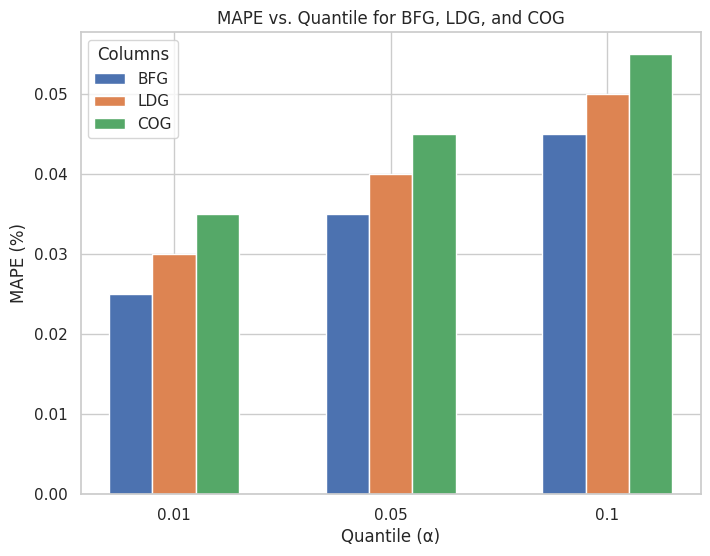

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Quantile values α
quantiles = [0.01, 0.05, 0.1]

# MAPE values for 'BFG', 'LDG', and 'COG' columns
mape_bfg = [0.025, 0.035, 0.045]  # Replace with your actual MAPE values for 'BFG'
mape_ldg = [0.030, 0.040, 0.050]  # Replace with your actual MAPE values for 'LDG'
mape_cog = [0.035, 0.045, 0.055]  # Replace with your actual MAPE values for 'COG'

# Create a bar plot for 'BFG'
plt.figure(figsize=(8, 6))
x = np.arange(len(quantiles))
width = 0.2

plt.bar(x - width, mape_bfg, width, label='BFG')
plt.bar(x, mape_ldg, width, label='LDG')
plt.bar(x + width, mape_cog, width, label='COG')

# Add labels and a title
plt.xlabel('Quantile (α)')
plt.ylabel('MAPE (%)')
plt.title('MAPE vs. Quantile for BFG, LDG, and COG')
plt.xticks(x, quantiles)
plt.legend(title='Columns')

# Customize the plot as needed
plt.grid(True)

# Show the plot
plt.show()



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# Load your dataset (assuming you have it in a CSV file)
data = df

# Specify the target variables you want to predict
target_variables = ['BFG', 'LDG', 'COG']

# Specify the number of past periods to consider for each forecast
p = 20

# Specify the number of future steps to forecast
T = 8

# Create lag features for each target variable based on the specified 'p'
for target_variable in target_variables:
    for lag in range(1, p+1):
        data[f'{target_variable}_lag_{lag}'] = data[target_variable].shift(lag)

# Drop rows with missing values resulting from lag features
data.dropna(inplace=True)

# Create X (features) and y (target) datasets for each target variable
X = data[[f'{target_variable}_lag_{lag}' for target_variable in target_variables for lag in range(1, p+1)]]
y = data[target_variables]
# Split the data into training and testing sets (you can adjust the split ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a separate GradientBoostingRegressor model for each target variable
models = {}
for target_variable in target_variables:
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train[target_variable])
    models[target_variable] = model

# Make predictions for T future steps for each target variable
forecasted_values = {}
for target_variable in target_variables:
    forecasted_values[target_variable] = []
    for t in range(1, T + 1):
        # Prepare the input data for forecasting by using the last p actual values
        last_p_values = data[[f'{target_variable}_lag_{lag}' for lag in range(1, p + 1)]].tail(1).values
        forecast_input = last_p_values.reshape(1, -1)

        # Make the forecast for the next step
        forecasted_value = models[target_variable].predict(forecast_input)[0]
        forecasted_values[target_variable].append(forecasted_value)

        # Update the data with the forecasted value
        new_row = {f'{target_variable}_lag_{lag}': forecasted_values[target_variable][-lag] for lag in range(1, p + 1)}
        data = data.append(new_row, ignore_index=True)

# Calculate MAPE for each target variable and each step of the forecast
mape_results = {}
for target_variable in target_variables:
    true_values = data[target_variable][-T:].values
    forecasted_values_for_variable = forecasted_values[target_variable]
    mape_results[target_variable] = [mean_absolute_percentage_error(true_values[:t], forecasted_values_for_variable[:t]) * 100 for t in range(1, T+1)]

# Print MAPE results for each target variable
for target_variable in target_variables:
    print(f"MAPE for {target_variable} ({T}-step forecast):")
    print(mape_results[target_variable])



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


ValueError: ignored

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# Load your dataset (assuming you have it in a CSV file)
data = copy(df)

# Specify the target variables you want to predict
target_variables = ['BFG', 'LDG', 'COG']

# Specify the number of past periods to consider for the forecast
p = 20

# Specify the number of future steps to forecast
T = 8

# Create lag features for each target variable based on the specified 'p'
for target_variable in target_variables:
    for lag in range(1, p+1):
        data[f'{target_variable}_lag_{lag}'] = data[target_variable].shift(lag)

# Drop rows with missing values resulting from lag features
data.dropna(inplace=True)

# Initialize a dictionary to store models for each target variable
models = {}

# Perform forecasting for each target variable
for target_variable in target_variables:
    # Create X (features) and y (target) datasets
    X = data[[f'{target_variable}_lag_{lag}' for lag in range(1, p+1)]]
    y = data[target_variable]

    # Split the data into training and testing sets (you can adjust the split ratio)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train a GradientBoostingRegressor model for each target variable
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)

    models[target_variable] = model  # Store the model in the dictionary

# Make predictions for T future steps for each target variable
forecasted_values = {}
for target_variable in target_variables:
    forecasted_values[target_variable] = []
    for t in range(1, T+1):
        # Prepare the input data for forecasting by using the last p actual values
        last_p_values = data[target_variable].tail(p).values
        forecast_input = last_p_values.reshape(1, -1)

        # Make the forecast for the next step
        forecasted_value = models[target_variable].predict(forecast_input)[0]
        forecasted_values[target_variable].append(forecasted_value)

        # Update the data with the forecasted value
        data = data.append({target_variable: forecasted_value}, ignore_index=True)

# Calculate MAPE for each step of the forecast for each target variable
mape_results = {}
for target_variable in target_variables:
    true_values = data[target_variable][-T:].values
    mape_results[target_variable] = [mean_absolute_percentage_error(true_values[:t], forecasted_values[target_variable][:t]) * 100 for t in range(1, T+1)]

# Print MAPE results for each target variable
for target_variable in target_variables:
    print(f"MAPE for {target_variable} ({T}-step forecast):")
    print(mape_results[target_variable])


NameError: ignored

In [ ]:
df.isnull().sum()

BFG           0
LDG           0
COG           0
BFG_lag_1     0
BFG_lag_2     0
             ..
COG_lag_16    0
COG_lag_17    0
COG_lag_18    0
COG_lag_19    0
COG_lag_20    0
Length: 63, dtype: int64

In [ ]:
df

,BFG,LDG,COG,BFG_lag_1,BFG_lag_2,BFG_lag_3,BFG_lag_4,BFG_lag_5,BFG_lag_6,BFG_lag_7,...,COG_lag_11,COG_lag_12,COG_lag_13,COG_lag_14,COG_lag_15,COG_lag_16,COG_lag_17,COG_lag_18,COG_lag_19,COG_lag_20
period,,,,,,,,,,,,,,,,,,,,,
21,533,57,49,536.0,526.0,540.0,522.0,519.0,492.0,483.0,...,42.0,44.0,44.0,43.0,42.0,42.0,42.0,42.0,41.0,42.0
22,512,59,50,533.0,536.0,526.0,540.0,522.0,519.0,492.0,...,45.0,42.0,44.0,44.0,43.0,42.0,42.0,42.0,42.0,41.0
23,561,45,51,512.0,533.0,536.0,526.0,540.0,522.0,519.0,...,45.0,45.0,42.0,44.0,44.0,43.0,42.0,42.0,42.0,42.0
24,515,45,47,561.0,512.0,533.0,536.0,526.0,540.0,522.0,...,43.0,45.0,45.0,42.0,44.0,44.0,43.0,42.0,42.0,42.0
25,508,65,46,515.0,561.0,512.0,533.0,536.0,526.0,540.0,...,47.0,43.0,45.0,45.0,42.0,44.0,44.0,43.0,42.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,520,49,48,522.0,523.0,473.0,489.0,517.0,458.0,418.0,...,39.0,41.0,41.0,37.0,43.0,38.0,41.0,40.0,40.0,42.0
997,517,72,48,520.0,522.0,523.0,473.0,489.0,517.0,458.0,...,43.0,39.0,41.0,41.0,37.0,43.0,38.0,41.0,40.0,40.0
998,570,59,46,517.0,520.0,522.0,523.0,473.0,489.0,517.0,...,45.0,43.0,39.0,41.0,41.0,37.0,43.0,38.0,41.0,40.0
